Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel $\rightarrow$ Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell $\rightarrow$ Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [19]:
NAME = "JAKUB ANTCZAK"

# Wprowadzenie do programowania probabilistycznego

W tym notebooku zawarte są zadania wprowadzające do rachunku prawdopodobieństwa i statystyki w środowisku python oraz programowania probabilistycznego.


## Rachunek prawdopodobieństwa

Rachunek prawdopodobieństwa, czyli dział matematyki zajmujący się niepewnością i losowością, stanowi podstawę rozpoznawania wzorców. Umożliwia on ujęcie ilościowe niepewności wynikającej np. z szumów występujących w danych lub też ograniczonej ich ilości, dzięki czemu możemy wykonywać predykcje na podstawie danych, które są niekompletne lub niejednoznaczne.

W zadaniu będziemy posługiwać się przykładem. Wyobraźmy sobie dwa pudełka: jedno czerwone i jedno niebieskie. Czerwone pudełko zawiera w sobie 4 jabłka i 6 pomarańczy, natomiast niebieskie zawiera 7 jabłek i 3 pomarańcze. Załóżmy, że:

* losowo wybieramy jedno z pudełek i z tego pudełka losowo wybieramy owoc, a po zaobserwowaniu co to za owoc, zwracamy go do pudełka
* czerwone pudełko wybieramy 30% razy, a niebieskie 70% razy
* szansa na wybór każdego z owoców jest taka sama

W tym przykładzie, wybór pudełka jest **zmienną losową**; oznaczmy ją jako $B$. Zmienna ta może przyjmować dwie wartości: $B=r$ (czerwone pudełko) albo $B=b$ (niebieskie pudełko). Analogicznie, wybór owocu jest również zmienną losową; oznaczmy ją jako $F$ - wówczas $F=a$ oznacza wybór jabłka, a $F=o$ oznacza wybór pomarańczy.

Prawdopodobieństwo wyboru czerwonego pudełka wynosi $\Pr(B=r) = 0.3$, natomiast prawdopodobieństwo wyboru niebieskiego pudełka to $\Pr(B=b) = 0.7$. Są to zdarzenia rozłączne oraz obejmują wszystkie możliwe wyniki, zatem suma prawdopodobieństw ich wystąpienia wynosi $\Pr(B=r) + \Pr(B=b) = 1$.


### Zadanie 1.1a (0,25 p.)

Załóżmy, że powtarzamy powyższy schemat czterokrotnie w celu wylosowania czterech owoców (kolejność nie jest istotna). Podaj przestrzeń zdarzeń elementarnych dla doświadczenia losowego. Zapisz ją w formie listy krotek odpowiednich znaków (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_1`.


In [20]:
space_1 = [('a', 'o', 'o', 'o'), ('a', 'a', 'a', 'o'), ('a', 'a', 'o', 'o'), ('o', 'o', 'o', 'o'), ('a', 'a', 'a', 'a')]
# TU WPISZ KOD
#raise NotImplementedError()

In [21]:
assert type(space_1) == list
for sample in space_1:
    assert type(sample) == tuple
    assert len(sample) == 4
    for item in sample:
        assert type(item) == str
        assert len(item) == 1
        assert item in {"a", "o", "b", "r"}

### Zadanie 1.1b (0,25 p.)

Drugie z doświadczeń polega na wylosowaniu pary ${B, F}$: najpierw losujemy pudełko, a następnie losujemy z niego owoc. Podaj przestrzeń zdarzeń dla tak zdefiniowanego doświadczenia losowego. Zapisz je w postaci listy krotek (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_2`.


In [22]:
space_2 = [('r', 'a'), ('r','o'), ('b', 'a'), ('b', 'o')]
# TU WPISZ KOD
#raise NotImplementedError()

In [23]:
assert type(space_2) == list
for sample in space_2:
    assert type(sample) == tuple
    assert len(sample) == 2
    assert sample[0] in {"r", "b"}
    assert sample[1] in {"a", "o"}
    assert all(type(item) == str for item in sample)

Uogólniając powyższy przykład, rozważmy dwie zmienne losowe $X$ i $Y$. Zmienna $X$ może przyjąć dowolną wartość $x \in \{x_1, x_2, \ldots, x_M\}$, a zmienna $Y$ może przyjąć wartości $y \in \{y_i, y_2, \ldots, y_L\}$. Rozważmy, że $N$ razy próbkujemy wartości obu zmiennych $X$ i $Y$; liczba prób, w których $X=x_i$ i $Y=y_j$ wynosi $n_{ij}$. Ponadto, załózmy, że liczba przypadków, gdzie $X$ przyjmuje wartość $x_i$ (bez względu na wartość $Y$) to $c_i$; analogicznie liczba prób, gdy $Y=y_j$ oznaczamy przez $r_j$.

**Prawdopodobieństwo łączne**, tzn. prawdopodobieństwo, że zmienna $X$ przyjmie wartość $x_i$ oraz że $Y$ przyjmie wartość $y_j$ definiuje się jako:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N}\tag{1}$$

Implicite rozważamy tu granicę przy $N\rightarrow\infty$. Analogicznie, **prawdopodobieństwo brzegowe**, tzn. prawdopodobieństwo, że $X$ przyjmuje wartość $x_i$ bez względu na wartość $Y$ można zapisać jako:

$$\Pr(X=x_i) = \frac{c_i}{N}\tag{2}$$


### Zadanie 1.2 (0,25 p.)

W doświadczeniu losowym z pudełkami i owocami, rozpisz liczby wystąpień każdego z przypadków w tablicy dwudzielczej, które dadzą określone wcześniej prawdopodobieństwa, przekształcając powyższe wzory i przypisując odpowiednie wartości do zmiennych zadeklarowanych w tablicy. Tablica dwudzielcza to tabela przedstawiająca łączny rozkład dwóch zmiennych: każda komórka zawiera liczbę wystąpień kombinacji wartości zmiennych. Załóż, że wykonano $N=100$ prób.

| B / F  |            B=r |            B=b |             -        |
| ------ | -------------- | -------------- | -------------------- |
|    F=a |         `n_ra` |         `n_ba` |         $\sum_B=r_a$ | 
|    F=o |         `n_ro` |         `n_bo` |         $\sum_B=r_o$ |
|     -   | $$\sum_F=c_r$$ | $$\sum_F=c_b$$ | $$\sum_B\sum_F = N$$ |


In [24]:
p_r = 0.3
p_b = 0.7

p_a_r = 0.4
p_o_r = 0.6

p_a_b = 0.7
p_o_b = 0.3

N=100
n_ra = N*p_r*p_a_r
n_ro = N*p_r*p_o_r
n_ba = N*p_b*p_a_b
n_bo = N*p_b*p_o_b

n_ra, n_ro, n_ba, n_bo

# TU WPISZ KOD
#raise NotImplementedError()


(12.0, 18.0, 49.0, 21.0)

In [25]:
assert n_ra + n_ro + n_ba + n_bo == 100

Marginalizacja polega na przejściu z rozkładu łącznego na rozkład brzegowy. Patrząc na tablicę dwudzielną, polega ona na zsumowaniu liczby wystąpień w wierszach albo kolumnach i podzieleniu przez całkowitą liczbę próbek (**reguła brzegowa**).

$$\Pr(X=x_i) = \sum_{j=1}^L \Pr(X=x_i, Y=y_j)\tag{3}$$

Jeżeli rozważymy przykłady, dla których $X=x_i$, wówczas część spośród nich, dla których $Y=y_j$ określa się mianem **prawdopodbieństwa warunkowego**:

$$\Pr(Y=y_j \mid X=x_i) = \frac{n_{ij}}{c_i}\tag{4}$$

Stąd też wynika zależność - **reguła łańcuchowa**:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_i}{N} = \Pr(Y=y_j \mid X=x_i)\Pr(X=x_i)\tag{5}$$


### Zadanie 1.3 (0,25 p.)

Oblicz wartości prawdopodobieństwa warunkowego dla wcześniejszego doświadczenia losowego:

|      prawdopodobieństwo      |  zmienna  |
| ---------------------------- | --------- |
|        $$\Pr(F=a \mid B=r)$$ | `p_fa_br` |
|        $$\Pr(F=o \mid B=r)$$ | `p_fo_br` |
|        $$\Pr(F=a \mid B=b)$$ | `p_fa_bb` |
|        $$\Pr(F=o \mid B=b)$$ | `p_fo_bb` |
|        $$\Pr(B=r \mid F=a)$$ | `p_br_fa` |
|        $$\Pr(B=b \mid F=a)$$ | `p_bb_fa` |
|        $$\Pr(B=r \mid F=o)$$ | `p_br_fo` |
|        $$\Pr(B=b \mid F=o)$$ | `p_bb_fo` |


In [26]:
# TU WPISZ KOD
p_fa_br = n_ra/(n_ra+n_ro)
p_fo_br = n_ro/(n_ra+n_ro)

p_fa_bb = n_ba/(n_ba+n_bo)
p_fo_bb = n_bo/(n_ba+n_bo)

p_fa_br, p_fo_br, p_fa_bb, p_fo_bb

p_f_a = p_fa_br*p_r + p_fa_bb*p_b
p_f_o = p_fo_br*p_r + p_fo_bb*p_b
p_f_a, p_f_o

p_br_fa = p_fa_br*p_r/p_f_a
p_bb_fa = p_fa_bb*p_b/p_f_a

p_br_fo = p_fo_br*p_r/p_f_o
p_bb_fo = p_fo_bb*p_b/p_f_o

#p_br_fa, p_bb_fa, p_br_fo, p_bb_fo
#p_fa_br, p_fo_br, p_fa_bb, p_fo_bb

#p_br_fa + p_bb_fa, p_br_fo + p_bb_fo

#raise NotImplementedError()


In [27]:
# testy ukryte


Przekształcając równanie reguły łańcuchowej $(5)$ oraz reguły brzegowej $(3)$ oraz wykorzystując właściwość, że $\Pr(X, Y) = \Pr(Y, X)$, uzyskujemy zależność pomiędzy prawdopodobieństwami warunkowymi:

$$\Pr(Y \mid X) = \frac{\Pr(X \mid Y) \Pr(Y)}{\Pr(X)}\tag{6}$$

Zależność ta nazywana jest **regułą Bayesa** i pełni ona centralną rolę w probabilistycznym uczeniu maszynowym. Wykorzystując ponownie regułę brzegową $(3)$, mianownik równania $(6)$ można przedstawić w postaci:

$$\Pr(X) = \sum_Y \Pr(X \mid Y) \Pr(Y)\tag{7}$$

Można go zatem potraktować jako "stałą normalizującą", gwarantującą, że prawdopodobieństwo warunkowe $\Pr(Y \mid X)$ sumuje się do $1$.


### Zadanie 1.4 (0,5 p.)

Test diagnostyczny dotyczący pewnej choroby ma następujące parametry:

* jeżeli pacjent jest chory ($Y=1$), to prawdopodobieństwo, że test diagnostyczny dał wynik pozytywny ($X=1$) wynosi $0.9$ (*czułość testu* - stosunek wyników prawdziwie dodatnich do sumy prawdziwie dodatnich i fałszywie ujemnych)
* prawdopodobieństwo że osoba jest chora na tę chorobę ($Y=1$) wynosi $0.014$
* jeżeli pacjent nie jest chory ($Y=0$), to prawdopodobieństwo, że test dał wynik negatywny ($X=0$) wynosi $0.97$ (*swoistość testu* - stosunek wyników prawdziwie ujemnych od sumy prawdziwie ujemnych i fałszywie dodatnich)

1. Zapisz te prawdopodobieństwa używając notacji matematycznej
1. Wyprowadź równania potrzebne do obliczenia prawdopodobieństwa, że pacjent jest chory, jeżeli test wyszedł pozytywny; oblicz to prawdopodobieństwo

Zapisz wynik w zmiennej `p_y1_x1`.


Prawdopodobieństwo, że test diagnosticzny dał wynik pozytywny, pod warunkiem, że pacjent jest chory, można zapisać jako
$$P(X=1|Y=1) = 0.9.$$
Prawdopodobieństwo, że pacjent jest chory wynosi
$$P(Y=1) = 0.014.$$
Prawdopodobieństwo, że test diagnosticzny dał wynik negatywny, pod warunkiem, że pacjent nie jest chory, można zapisać jako
$$P(X=0|Y=0) = 0.97.$$

Wyprowadźmy równanie na prawdopodobieństwo, że pacjent jest chory, pod warunkiem, że test wyszedł pozytywny.
$$ P(Y=1|X=1) = \frac{P(X=1|Y=1)P(Y=1)}{P(X=1)}$$

Widzimy, że potrzebujemy obliczyć mianownik $P(X=1)$.

$$ P(X=1) = P(X=1|Y=1)P(Y=1) + P(X=1|Y=0)P(Y=0) = 0.9 \cdot 0.014 + (1-0.97) \cdot (1-0.014) = 0.04218$$

Wystarczy wstawić wartości do wzoru na $P(Y=1|X=1)$, aby obliczyć prawdopodobieństwo, że pacjent jest chory, pod warunkiem, że test wyszedł pozytywny.

In [37]:
p_x1_y1 = 0.9
p_y1 = 0.014
p_y0 = 1 - p_y1
p_x1_y0 = 0.1
p_x0_y0 = 0.97
p_x1_y0 = 1 - p_x0_y0

p_x1 = p_x1_y1*p_y1 + p_x1_y0*p_y0
p_y1_x1 = p_x1_y1*p_y1/p_x1
p_y1_x1, p_x1
#raise NotImplementedError()


(0.2987197724039828, 0.04218000000000002)

In [29]:
# testy ukryte


### Rozkłady prawdopodobieństwa

Oprócz opisywanych wcześniej zmiennych losowych dyskretnych, prawdopodobieństwa mogą dotyczyć również zmiennych ciągłych. Rozkład prawdopodobieństa zmiennych ciągłych opisany jest **funkcją gęstości** $p(x)$. Prawdopodobieństwo, że zmienna losowa $X$ przyjmuje wartości z przedziału $[a, b]$ można wyznaczyć przy pomocy równania:

$$\Pr(a \le X \le b) = \int_a^b p(x) dx\tag{8}$$

Funkcja gęstości spełnia dwa kryteria:
* $p(x) \ge 0$ - prawdopodobieństwo jest nieujemne,
* $\int_{-\infty}^{\infty} p(x) dx = 1$ - całkowite prawdopodobieństwo jest równe $1$.


**Dystrybuantą**, czyli funkcją skumulowanej gęstości prawdopodobieństwa nazywamy prawdopodobieństwo, że $x$ leży w przedziale $(-\infty, z)$:

$$F(z) = \int_{-\infty}^z p(x) dx\tag{9}$$

Dla zmiennych dyskretnych funkcja $p(x)$ jest nazywana **funkcją masy prawdopodobieństwa**.

Załóżmy, że $x$ i $y$ są dwoma zmiennymi ciągłymi. Funkcja gęstości spełnia reguły:

* brzegową: $p(x) = \int p(x, y) dy$
* łańcuchową: $p(x, y) = p(x \mid y)p(y)$
* Bayesa: $p(y \mid x) = \frac{p(x \mid y) p(y)}{p(x)}$

#### Własności rozkładu prawdopodobieństwa

Podstawową własnością rozkładu jest **wartość oczekiwana**, określająca spodziewany wynik doświadczenia losowego. Dla rozkładu dyskretnego dany jest wzorem:

$$\mathbb{E}[X] = \sum_{x\in\mathcal{X}} x \cdot p(x)\tag{10}$$

natomiast dla rozkładu ciągłego definiuje się:

$$\mathbb{E}[X] = \int_{x\in\mathcal{X}} x \cdot p(x) dx\tag{11}$$

**Wariancja** to własność określająca jak bardzo wartości $x$ odchylają się od średniej (*rozpiętość rozkładu*)

$$Var[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2\tag{12}$$

**Odchylenie standardowe** definiowane jest jako pierwiastek z wariancji:

$$std[X] = \sqrt{Var[X]}\tag{13}$$

Dla dwóch zmiennych losowych $X$ i $Y$, **kowariancja** określa stopień, w jakim zależą od siebie liniowo. Dana jest ona wzorem:

$$cov[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \in (-\infty, \infty)\tag{14}$$

**Korelacja** jest znormalizowana postacią kowariancji:

$$corr[X, Y] = \frac{cov[X, Y]}{\sqrt{Var[X]Var[Y]}} \in [-1, 1]\tag{15}$$

Dla liniowo zależnych zmiennych losowych $X$ i $Y$ $|corr[X, Y]| = 1$. Gdy zmienne są od siebie niezależne, tzn. $\Pr(X,Y) = \Pr(X)\Pr(Y)$, wtedy $corr[X, Y] = 0$.


### Zadanie 2.1 (1p.) (+0.5p.)
Wygeneruj próbkę 1000 liczb z rozkładu normalnego o średniej 0 i odchyleniu standardowym 1. 

Zaimplementuj funkcje obliczające podstawowe statystyki dla zadanej próby:
1. Średnią arytmetyczną
2. Wariancję
3. Odchylenie standardowe
4. Medianę

Nie używaj wbudowanych funkcji numpy do tych obliczeń. 

Przetestuj funkcje na przykładowych danych. Porównaj z teoretycznymi wartościami.


#### Zadanie dodatkowe (0.5 p.)

Zaimplementuj:
1. Skośność (trzeci moment centralny)
2. Kurtozę (czwarty moment centralny)

Następnie użyj testu Shapiro-Wilka do sprawdzenia normalności rozkładu wygenerowanej próby (możesz użyć funkcji z scipy.stats).


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# TU WPISZ KOD
sample = np.random.normal(loc=0, scale=1, size=1000)

def calculate_mean(x):
    return sum(x)/len(x)
    #raise NotImplementedError("Not implemented")

def calculate_variance(x):
    mean = sum(x)/len(x)
    return sum((i - mean)**2 for i in x)/len(x)
    #raise NotImplementedError("Not implemented")

def calculate_std(x):
    mean = sum(x)/len(x)
    return (sum((i - mean)**2 for i in x)/len(x))**0.5
    #raise NotImplementedError("Not implemented")

def calculate_median(x):
    x = sorted(x)
    n = len(x)
    if n % 2 == 0:
        return (x[n//2-1] + x[n//2])/2
    else:
        return x[n//2]
    #raise NotImplementedError("Not implemented")

def calculate_skewness(x):
    n = len(x)
    mean = sum(x)/n
    m_3 = (1/n)*sum((i - mean)**3 for i in x) #srednia do 3
    m_2 = (1/n)*sum((i - mean)**2 for i in x) #odchylenie standardowe do 3 jak sie podniesie do 3/2
    if m_2 == 0:
        raise ValueError("Drugi moment centralny (wariancja) jest równy 0.")
    return m_3/m_2**(3/2)


def calculate_kurtosis(x):
    n=len(x)
    mean = sum(x)/n
    m_4 = sum((i - mean)**4 for i in x)/n
    std = (sum((i - mean)**2 for i in x)/n)**0.5
    if std == 0:
        raise ValueError("Odchylenie standardowe jest równe 0.")
    return m_4/std**4 

def calculate_shapiro_wilk(x):
    statistic, p_value = stats.shapiro(x)
    return statistic, p_value


sample_statistics = {
    "Średnia arytmetyczna": calculate_mean(sample),
    "Wariancja": calculate_variance(sample),
    "Odchylenie standardowe": calculate_std(sample),
    "Mediana": calculate_median(sample),
    "Skośność": calculate_skewness(sample),
    "Kurtoza": calculate_kurtosis(sample),
}

for name, value in sample_statistics.items():
    print(f"{name}: {value:.4f}")

statistic, p_value = calculate_shapiro_wilk(sample)
print(f"\nTest Shapiro-Wilka:")
print(f"  Statystyka: {statistic:.4f}")
print(f"  p-wartość: {p_value:.4f}")
### KONIEC ROZWIĄZANIA

Średnia arytmetyczna: 0.0044
Wariancja: 1.0050
Odchylenie standardowe: 1.0025
Mediana: 0.0112
Skośność: 0.0450
Kurtoza: 3.2276

Test Shapiro-Wilka:
  Statystyka: 0.9986
  p-wartość: 0.6486


In [31]:
test_data = [1, 2, 3, 4, 5]

assert abs(calculate_mean(test_data) - 3.0) < 1e-10, "Błąd w calculate_mean"
assert abs(calculate_variance(test_data) - 2.0) < 1e-10, "Błąd w calculate_variance"
assert abs(calculate_std(test_data) - np.sqrt(2.0)) < 1e-10, "Błąd w calculate_std"
assert abs(calculate_median(test_data) - 3.0) < 1e-10, "Błąd w calculate_median"
assert abs(calculate_median([1, 2, 3, 4]) - 2.5) < 1e-10, "Błąd w calculate_median dla parzystej liczby elementów"

# Dla symetrycznego rozkładu skośność powinna być bliska 0
symmetric_data = [-2, -1, 0, 1, 2]
assert abs(calculate_skewness(symmetric_data)) < 1e-10, "Błąd w calculate_skewness"

# Dla standardowego rozkładu normalnego kurtoza powinna być bliska 3
normal_data = np.random.normal(0, 1, 1000)
assert abs(calculate_kurtosis(normal_data) - 3.0) < 0.5, "Błąd w calculate_kurtosis"

print("Wszystkie testy przeszły pomyślnie!")

Wszystkie testy przeszły pomyślnie!


### Zadanie 2.2 (0.25p.)

Zwizualizuj dwa wykresy:
- histogram zmiennej z zadania wyzej
- porównanie rozkładu empirycznego (np. KDE) z teoretycznym N(0,1)


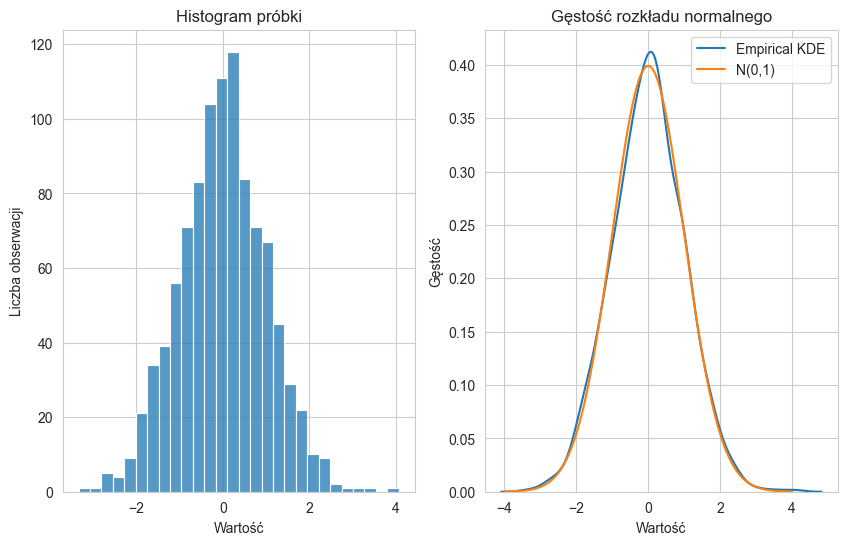

In [32]:
# TU WPISZ KOD
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.histplot(sample, kde=False, ax=ax[0])
ax[0].set_title("Histogram próbki")
ax[0].set_xlabel("Wartość")
ax[0].set_ylabel("Liczba obserwacji")

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)
sns.kdeplot(sample, ax=ax[1], label="Empirical KDE")
ax[1].plot(x, y, label="N(0,1)")
ax[1].set_title("Gęstość rozkładu normalnego")
ax[1].set_xlabel("Wartość")
ax[1].set_ylabel("Gęstość")
ax[1].legend()
#raise NotImplementedError()

### Zadanie 2.3 (1p.)

Wygeneruj dwie skorelowane zmienne losowe z rozkładu normalnego (Gaussowskiego) o zadanych parametrach:
- Pierwsza zmienna X ~ N(0,1)
- Druga zmienna Y = aX + bZ, gdzie Z ~ N(0,1), a=0.7, b=0.5

Następnie:
1. Oblicz empiryczną kowariancję między zmiennymi X i Y
2. Oblicz empiryczny współczynnik korelacji Pearsona
3. Zwizualizuj wykres rozproszenia (scatter plot) pokazujący zależność między zmiennymi

Empiryczna kowariancja: 0.6782
Empiryczna korelacja: 0.8017


Text(0, 0.5, 'y')

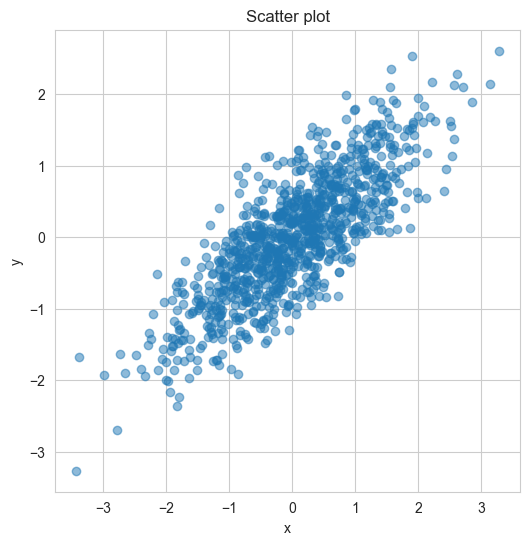

In [33]:
# TU WPISZ KOD
#raise NotImplementedError()

n = 1000
a = 0.7
b = 0.5

x = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)
y = a*x + b*z

def empirical_cov_function(x,y):
    n = len(x)
    x_mean = sum(x)/n
    y_mean = sum(y)/n
    s=0
    for i in range(n):
        s+=(x[i]-x_mean)*(y[i]-y_mean)
    return s/(n-1)
empirical_cov = empirical_cov_function(x,y)

def empirical_corr_function(x,y):
    n = len(x)
    x_mean = sum(x)/n
    y_mean = sum(y)/n
    cov_xy = empirical_cov_function(x,y)
    std_x = (sum((i - x_mean)**2 for i in x)/n)**0.5
    std_y = (sum((i - y_mean)**2 for i in y)/n)**0.5
    return cov_xy/(std_x*std_y)

empirical_corr = empirical_corr_function(x,y)

print(f"Empiryczna kowariancja: {empirical_cov:.4f}")
print(f"Empiryczna korelacja: {empirical_corr:.4f}")

# scatter plot for y
plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")

# TU WPISZ KOD DO WIZUALIZACJI
#raise NotImplementedError()


In [34]:
assert len(x) == n == 1000, f"Rozmiar próbki powinien wynosić 1000, a wynosi {len(x)}"

assert abs(np.mean(x)) < 0.1, f"Średnia x powinna być bliska 0, a wynosi {np.mean(x):.4f}"
assert abs(np.std(x) - 1) < 0.1, f"Odchylenie standardowe x powinno być blisko 1, a wynosi {np.std(x):.4f}"

theoretical_corr = 0.7 / np.sqrt(0.7**2 + 0.5**2)  # teoretyczna korelacja
assert abs(empirical_corr - theoretical_corr) < 0.1, f"Korelacja powinna być bliska {theoretical_corr:.4f}, a wynosi {empirical_corr:.4f}"

_, p_value = stats.shapiro(x)
assert p_value > 0.05, f"Test Shapiro-Wilka sugeruje, że x nie ma rozkładu normalnego (p-value = {p_value:.4f})"

print("Wszystkie testy przeszły pomyślnie!")

Wszystkie testy przeszły pomyślnie!


### Zadanie 2.4 (0.5p.)
 
 Wizualizacja różnych rozkładów prawdopodobieństwa
 
 Stwórz wykres składający się z 4 podwykresów (2x2) przedstawiających następujące rozkłady:
 - Rozkład normalny N(0,1)
 - Rozkład jednostajny U(0,1) 
 - Rozkład wykładniczy Exp(1)
 - Rozkład Poissona Poisson(3)

 Dla każdego rozkładu:
 1. Wygeneruj 1000 próbek
 2. Stwórz histogram z 30 przedziałami (bins)
 3. Nałóż na histogram estymator jądrowy gęstości (KDE)
 4. Dodaj odpowiedni tytuł

 Użyj bibliotek numpy do generowania próbek oraz seaborn/matplotlib do wizualizacji.


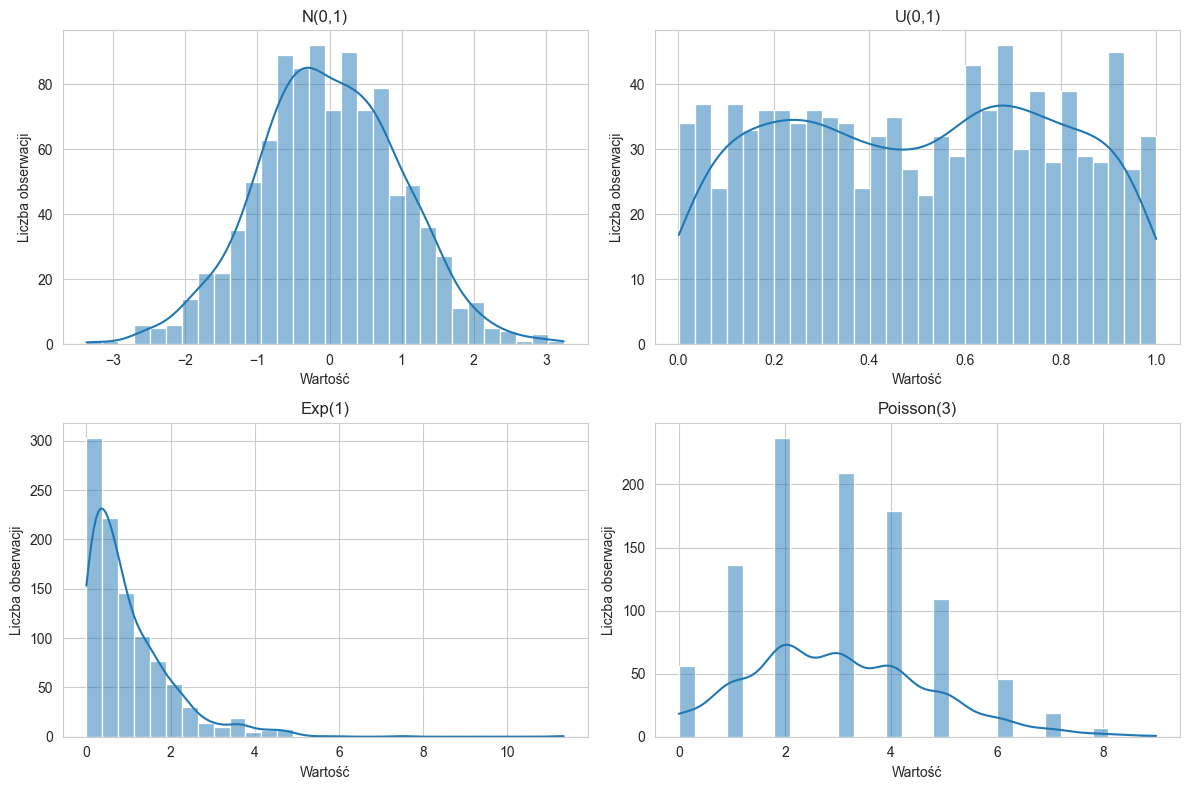

In [35]:
### POCZĄTEK ROZWIĄZANIA
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

dist_samples = {
    "N(0,1)": np.random.normal(loc=0, scale=1, size=1000),
    "U(0,1)": np.random.uniform(low=0, high=1, size=1000),
    "Exp(1)": np.random.exponential(scale=1, size=1000),
    "Poisson(3)": np.random.poisson(lam=3, size=1000),
}

def plot_dist(dist_name, samples, ax):
    sns.histplot(samples, kde=True, ax=ax, bins=30)
    ax.set_title(dist_name)
    ax.set_xlabel("Wartość")
    ax.set_ylabel("Liczba obserwacji")
    #raise NotImplementedError()

for i, (dist_name, samples) in enumerate(dist_samples.items()):
    plot_dist(dist_name, samples, axes[i])

plt.tight_layout()
plt.show()
### KONIEC ROZWIĄZANIA

 ### Centralne Twierdzenie Graniczne (CTG)
 
 Centralne Twierdzenie Graniczne to jedno z najważniejszych twierdzeń w teorii prawdopodobieństwa.
 Mówi ono, że suma (lub średnia) dużej liczby niezależnych zmiennych losowych o tym samym rozkładzie i skończonej wariancji będzie miała w przybliżeniu rozkład normalny, niezależnie od rozkładu wyjściowego.

 ### Zadanie 2.5 (1p.):
 1. Wygeneruj próbki z trzech różnych rozkładów:
    - Rozkład jednostajny U(0,1)
    - Rozkład wykładniczy Exp(1)
    - Rozkład Poissona Poisson(3)
 2. Dla każdego rozkładu:
    - Wygeneruj 1000 prób, gdzie każda próba składa się z 30 obserwacji
    - Oblicz średnią dla każdej próby
    - Narysuj histogram otrzymanych średnich
    - Nałóż na histogram estymator jądrowy gęstości (KDE)
 3. Zaobserwuj, że:
    - Rozkład średnich jest zbliżony do normalnego dla wszystkich rozkładów wyjściowych
    - Rozrzut średnich (wariancja) jest mniejszy niż w oryginalnych rozkładach
    - Im większa liczba obserwacji w próbie, tym lepsze przybliżenie rozkładem normalnym

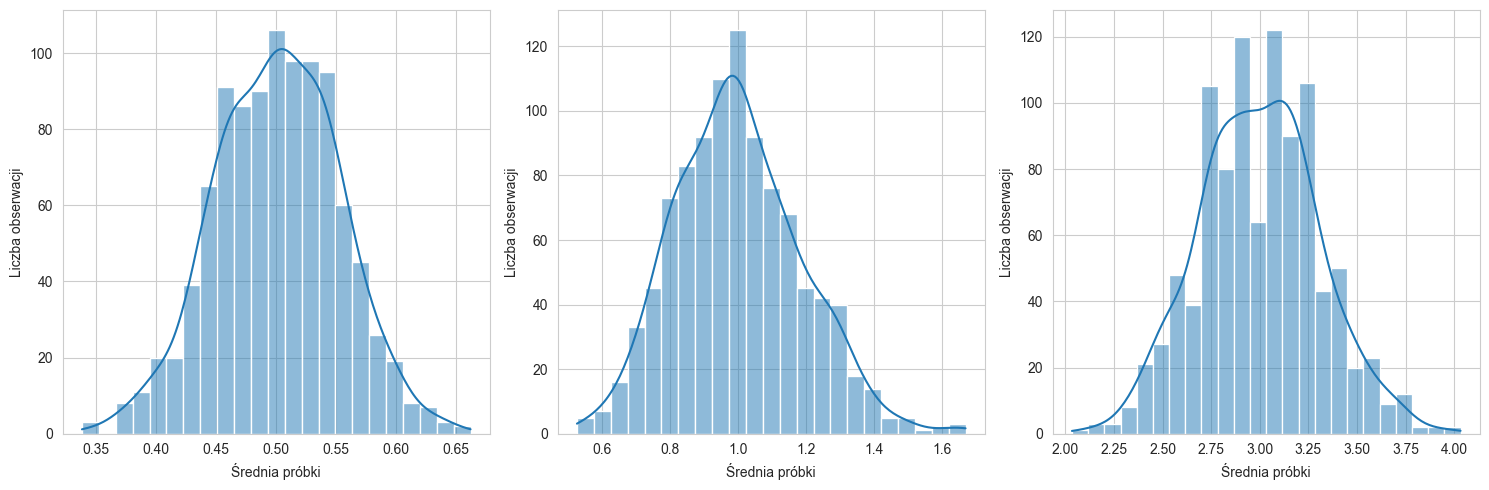

In [36]:
### POCZĄTEK ROZWIĄZANIA
num_samples = 1000 # Liczba prób
sample_size = 30  # Wielkość każdej próby

means = {
    "uniform": [],  
    "exponential": [],
    "poisson": []
}

means["uniform"] = np.random.uniform(low=0, high=1, size=(num_samples, sample_size)).mean(axis=1)
means["exponential"] = np.random.exponential(scale=1, size=(num_samples, sample_size)).mean(axis=1)
means["poisson"] = np.random.poisson(lam=3, size=(num_samples, sample_size)).mean(axis=1)

# print(np.var(means["uniform"])) #1/12 
# print(np.var(means["exponential"])) #1
# print(np.var(means["poisson"])) #3

def plot_means(means, i):
    sns.histplot(means, kde=True, ax=axes[i])
    axes[i].set_xlabel("Średnia próbki")
    axes[i].set_ylabel("Liczba obserwacji")
    

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (dist_name, means) in enumerate(means.items()):
    plot_means(means, i)
plt.tight_layout()
plt.show()
### KONIEC ROZWIĄZANIA